# Exercises

Investigate the behavior of the statements below by looking
at the values of the arrays a and b after assignments:
```
a = np.arange(5)
b = a
b[2] = -1
b = a[:]
b[1] = -1
b = a.copy()
b[0] = -1
```

Generate a 1D NumPy array containing numbers from -2 to 2
in increments of 0.2. Use optional start and step arguments
of **np.arange()** function.

In [1]:
a = np.arange(-2, 2, 0.2)
print(a)

[ -2.00000000e+00  -1.80000000e+00  -1.60000000e+00  -1.40000000e+00
  -1.20000000e+00  -1.00000000e+00  -8.00000000e-01  -6.00000000e-01
  -4.00000000e-01  -2.00000000e-01  -4.44089210e-16   2.00000000e-01
   4.00000000e-01   6.00000000e-01   8.00000000e-01   1.00000000e+00
   1.20000000e+00   1.40000000e+00   1.60000000e+00   1.80000000e+00]


Generate another 1D NumPy array containing 11 equally
spaced values between 0.5 and 1.5. Extract every second
element of the array

In [ ]:
a = np.linspace(0.5, 1.5, 11)
print(a[::2])

Create a 4x4 array with arbitrary values.

In [6]:
a = np.random.random((4,4))
print(a)

[[ 0.36116993  0.80643621  0.54713737  0.03586701]
 [ 0.71914881  0.35213237  0.76295359  0.80786137]
 [ 0.79613374  0.7223311   0.93131402  0.8891921 ]
 [ 0.81252532  0.65745696  0.94049188  0.37031642]]


Extract every element from the second row

In [7]:
print(a[2,:])

[ 0.79613374  0.7223311   0.93131402  0.8891921 ]


Extract every element from the third column

In [8]:
print(a[:, 3])

[ 0.03586701  0.80786137  0.8891921   0.37031642]


Assign a value of 0.21 to upper left 2x2 subarray.

In [9]:
a[:2,:2] = 0.2
print(a)

[[ 0.2         0.2         0.54713737  0.03586701]
 [ 0.2         0.2         0.76295359  0.80786137]
 [ 0.79613374  0.7223311   0.93131402  0.8891921 ]
 [ 0.81252532  0.65745696  0.94049188  0.37031642]]


A simple method for evaluating integral of function **f(x)** numerically is by
the middle Riemann sum
$$S = \sum_{i=1}^n f(x'_i) \Delta x$$
with $x'_i = (x_i + x_{i+1}) / 2$ and $\Delta x$ the spacing between the two points $x_i$ and $x_{i+1}$. Construct 1D Numpy array containing the values of $x_i$ in the interval $[0, \pi/2]$ with a spacing $\Delta x = 0.1$. Calculate the Rieman sum of **sin** function, trying to avoid **for** loops. How much does the value differ from 1.0? Investigate also how the
results changes with the choice of $\Delta x$

In [11]:
dx = 0.01
xi = np.arange(0, np.pi/2, dx)

xip = (xi[1:] + xi[:-1]) / 2.
s = np.sum(np.sin(xip) * dx)
print("Riemann sum: {0:f}".format(s))

Riemann sum: 0.999208


Plot to the same graph **sin** and **cos** functions in the interval $[-\pi/2, \pi/2]$. Use $\theta$ as x-label and insert also legends.

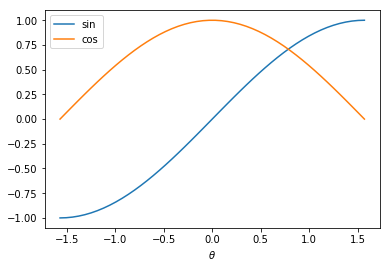

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
theta = np.linspace(-np.pi / 2, np.pi / 2, 50)
plt.plot(theta, np.sin(theta), label='sin')
plt.plot(theta, np.cos(theta), label='cos')
plt.xlabel(r'$\theta$')
plt.legend()

### Bonus exercise: Game of Life
Game of life is a cellular automaton devised by John Conway
in 70's: http://en.wikipedia.org/wiki/Conway's_Game_of_Life

The game consists of two dimensional orthogonal grid of
cells. Cells are in two possible states, alive or dead. Each cell
interacts with its eight neighbours, and at each time step the
following transitions occur:
* Any live cell with fewer than two live neighbours dies, as if
caused by underpopulation
* Any live cell with more than three live neighbours dies, as if
by overcrowding
* Any live cell with two or three live neighbours lives on to
the next generation
* Any dead cell with exactly three live neighbours becomes a
live cell

The initial pattern constitutes the seed of the system, and
the system is left to evolve according to rules. Deads and
births happen simultaneously.

Implement the Game of Life using Numpy, and visualize the
evolution with Matplotlib's **imshow**. Try first 32x32
square grid and cross-shaped initial pattern:
![Initial pattern for Game of Life](../images/gol.png)
Try also other grids and initial patterns (e.g. random
pattern). Try to avoid **for** loops.

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:26: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


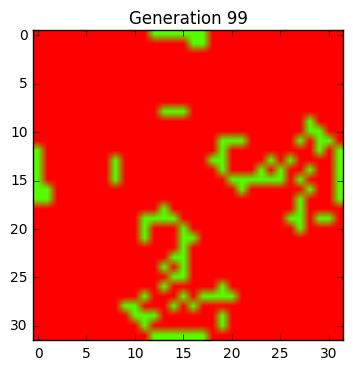

In [21]:
def gol_update(board):
    # number of neighbours that each square has
    neighbours = np.zeros(board.shape)
    neighbours[1:, 1:] += board[:-1, :-1]
    neighbours[1:, :-1] += board[:-1, 1:]
    neighbours[:-1, 1:] += board[1:, :-1]
    neighbours[:-1, :-1] += board[1:, 1:]
    neighbours[:-1, :] += board[1:, :]
    neighbours[1:, :] += board[:-1, :]
    neighbours[:, :-1] += board[:, 1:]
    neighbours[:, 1:] += board[:, :-1]

    new_board = np.where(neighbours < 2, 0, board)
    new_board = np.where(neighbours > 3, 0, new_board)
    new_board = np.where(neighbours == 3, 1, new_board)

    # Periodic boundaries
    new_board[0,:] = new_board[-1,:]
    new_board[:,0] = new_board[:,-1]
    return new_board

# Cross pattern
size = 32
board = np.zeros((size, size), int)
board[size/2,:] = 1
board[:,size/2] = 1
plt.imshow(board, cmap = plt.cm.prism)
for iter in range(100):
    board = gol_update(board)
    plt.imshow(board, cmap = plt.cm.prism)
    plt.title('Generation {0}'.format(iter))

